In [1]:
import pandas as pd
import plotly.express as px

In [2]:
data=pd.read_csv('laptop_data.csv')
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

C:\Users\moin2\AppData\Local\Temp\ipykernel_4652\2171092255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

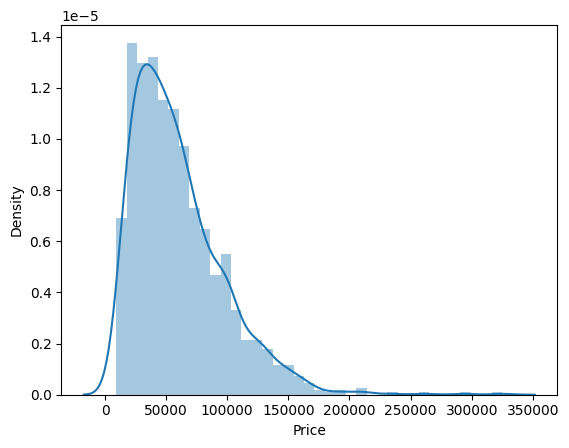

In [4]:
import seaborn as sns
sns.distplot(data['Price'])

<Axes: ylabel='Price'>

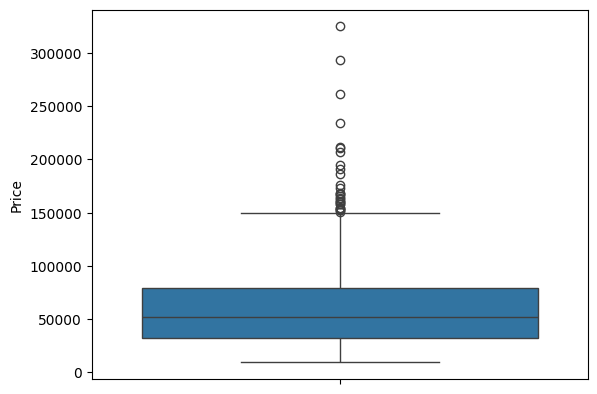

In [5]:
sns.boxplot(data['Price'])

In [6]:
fig =px.box(data['Price'])
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x': array(['Price', 'Price', 'Price', ..., 'Price', 'Price', 'Price'], dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('ih9j7ipt8UAp7Q2+8GLnQAAAAAAA69' ... 'hcj9THQArXo3A94ONArkfhehQz00A='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'variable'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [7]:
price = data['Price']

mu = price.mean()
sig = price.std()

scaled_price = [(i-mu)/sig for i in price]

data['Scaled_Price']=scaled_price

data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Scaled_Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0.309013
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,-0.321522
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,-0.784950
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2.022525
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0.972681


1.2716287571588798
2.428456436398843
-2.658058592236676


C:\Users\moin2\AppData\Local\Temp\ipykernel_4652\4135177387.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Scaled_Price', ylabel='Density'>

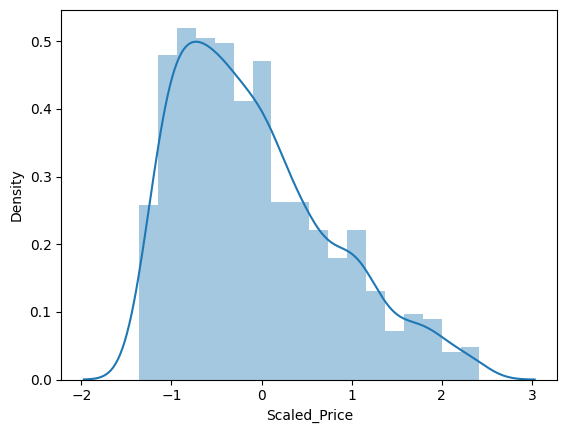

In [8]:
q3 = data['Scaled_Price'].quantile(0.75)
q1 = data['Scaled_Price'].quantile(0.25)

iqr = q3-q1
ufence = q3 + (1.5*iqr)
lfence = q1 - (1.5*iqr)
print(iqr)
print(ufence)
print(lfence)

distribution = data[(data['Scaled_Price']>=lfence) & (data['Scaled_Price']<=ufence)]
sns.distplot(distribution['Scaled_Price'])

In [9]:
distribution['Scaled_Price'].describe()

count    1274.000000
mean       -0.076649
std         0.853464
min        -1.358619
25%        -0.753273
50%        -0.244184
75%         0.433797
max         2.417798
Name: Scaled_Price, dtype: float64

In [10]:
data=distribution

In [11]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Scaled_Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0.309013
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,-0.321522
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,-0.784950
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2.022525
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0.972681


In [12]:
data=data.drop(columns={'Unnamed: 0','Price'})

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Scaled_Price      1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


In [14]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Scaled_Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,0.309013
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,-0.321522
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,-0.784950
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2.022525
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,0.972681


In [15]:
data['Res_1']=data['ScreenResolution'].str.extract(r'(\d+)[^\d]+(\d+)')[0]
data['Res_2']=data['ScreenResolution'].str.extract(r'(\d+)[^\d]+(\d+)')[1]

data.head(20)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Scaled_Price,Res_1,Res_2
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,0.309013,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,-0.321522,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,-0.784950,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2.022525,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,0.972681,2560,1600
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,-1.035304,1366,768
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,1.453891,2880,1800
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,0.050089,1440,900
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,0.531199,1920,1080
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,-0.505983,1920,1080


In [16]:
data[data['ScreenResolution'].str.contains('Retina')].Scaled_Price.mean()

np.float64(0.6568708063885926)

In [17]:
def assign_weight(resolution):
    if 'Retina' in resolution:
        return 1.915
    elif 'IPS' in resolution:
        return 1.304
    elif 'Touchscreen' in resolution:
        return 1.447
    elif 'Ultra' in resolution:
        return 3.277
    else:
        return 1

In [18]:
data['Screen_Weights']=data['ScreenResolution'].apply(assign_weight)


data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Scaled_Price,Res_1,Res_2,Screen_Weights
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,0.309013,2560,1600,1.915
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,-0.321522,1440,900,1.000
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,-0.784950,1920,1080,1.000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2.022525,2880,1800,1.915
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,0.972681,2560,1600,1.915


In [19]:
data = data.drop(columns={'ScreenResolution'})

In [20]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Scaled_Price,Res_1,Res_2,Screen_Weights
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,0.309013,2560,1600,1.915
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,-0.321522,1440,900,1.000
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,-0.784950,1920,1080,1.000
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2.022525,2880,1800,1.915
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,0.972681,2560,1600,1.915


In [27]:
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i3 7100U 2.4GHz',
       'Intel Atom x5-Z8350 1.44GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel C

In [28]:
data['Res_1']=data['Res_1'].astype(int)
data['Res_2']=data['Res_2'].astype(int)
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Scaled_Price,Res_1,Res_2,Screen_Weights
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,0.309013,2560,1600,1.915
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,-0.321522,1440,900,1.000
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,-0.784950,1920,1080,1.000
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2.022525,2880,1800,1.915
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,0.972681,2560,1600,1.915


In [30]:
data.dtypes

Company            object
TypeName           object
Inches            float64
Cpu                object
Ram                object
Memory             object
Gpu                object
OpSys              object
Weight             object
Scaled_Price      float64
Res_1               int64
Res_2               int64
Screen_Weights    float64
dtype: object

In [33]:
data['OpSys'].value_counts()

OpSys
Windows 10      1048
No OS             66
Linux             62
Windows 7         41
Chrome OS         27
macOS             12
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [42]:
data['OpSys']=data["OpSys"].str.replace('No OS','Windows 10')

In [43]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Scaled_Price,Res_1,Res_2,Screen_Weights
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,0.309013,2560,1600,1.915
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,-0.321522,1440,900,1.000
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.86kg,-0.784950,1920,1080,1.000
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2.022525,2880,1800,1.915
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,0.972681,2560,1600,1.915


In [51]:
data['Ram'].unique()
data['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '3.35kg', '2.23kg', '4.42kg', '2.69kg', '2.37kg',
       '2.08kg', '4.3kg', '1.68kg', '1.41kg', '4.14kg', '2.18kg',
       '2.24kg', '2.67kg', '2.14kg', '1.36kg', '2.25kg', '2.15kg',
       '2.19kg', '

In [50]:
def ramtoint(s):
    lst=s.split('G')
    return int(lst[0])

def wttofloat(s):
    lst=s.split('k')
    return float(lst[0])

In [53]:
#data['Ram']=data["Ram"].apply(ramtoint)
data['Weight']=data["Weight"].apply(wttofloat)

In [54]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Scaled_Price,Res_1,Res_2,Screen_Weights
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,0.309013,2560,1600,1.915
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,-0.321522,1440,900,1.000
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,-0.784950,1920,1080,1.000
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2.022525,2880,1800,1.915
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,0.972681,2560,1600,1.915


In [55]:
data.dtypes

Company            object
TypeName           object
Inches            float64
Cpu                object
Ram                 int64
Memory             object
Gpu                object
OpSys              object
Weight            float64
Scaled_Price      float64
Res_1               int64
Res_2               int64
Screen_Weights    float64
dtype: object

In [57]:
def cpucompany(s):
    return s.split()[0]

In [58]:
data['CPU_Company']=data['Cpu'].apply(cpucompany)

In [60]:
data.head(20)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Scaled_Price,Res_1,Res_2,Screen_Weights,CPU_Company
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,0.309013,2560,1600,1.915,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,-0.321522,1440,900,1.000,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,-0.784950,1920,1080,1.000,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2.022525,2880,1800,1.915,Intel
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,0.972681,2560,1600,1.915,Intel
5,Acer,Notebook,15.6,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,-1.035304,1366,768,1.000,AMD
6,Apple,Ultrabook,15.4,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,1.453891,2880,1800,1.915,Intel
7,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,0.050089,1440,900,1.000,Intel
8,Asus,Ultrabook,14.0,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,0.531199,1920,1080,1.000,Intel
9,Acer,Ultrabook,14.0,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,-0.505983,1920,1080,1.304,Intel


In [62]:
data['CPU_Company'].value_counts()

CPU_Company
Intel      1211
AMD          62
Samsung       1
Name: count, dtype: int64

In [88]:
def cpuclock(s):
    a=s.split()[-1]
    return float(a.split('G')[0])

In [90]:
data['Clock_Speed']=data['Cpu'].apply(cpuclock)

In [91]:
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Scaled_Price,Res_1,Res_2,Screen_Weights,CPU_Company,Clock_Speed
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,0.309013,2560,1600,1.915,Intel,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,-0.321522,1440,900,1.000,Intel,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,-0.784950,1920,1080,1.000,Intel,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2.022525,2880,1800,1.915,Intel,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,0.972681,2560,1600,1.915,Intel,3.1


In [93]:
data['Clock_Speed'].value_counts()

Clock_Speed
2.50    293
2.70    162
2.80    152
1.60    134
2.30     86
2.00     86
1.80     78
2.60     74
1.10     53
2.40     52
3.00     18
2.90     14
1.20     14
1.44     12
2.20     11
1.50     10
1.30      6
3.60      5
0.90      4
2.10      3
3.10      2
1.90      2
3.20      1
1.00      1
1.92      1
Name: count, dtype: int64

In [94]:
data['Clock_Speed'].corr(other=data['Scaled_Price'])

np.float64(0.4294093018925318)

In [109]:
print(data['Gpu'].value_counts().to_markdown())

| Gpu                            |   count |
|:-------------------------------|--------:|
| Intel HD Graphics 620          |     280 |
| Intel HD Graphics 520          |     185 |
| Intel UHD Graphics 620         |      68 |
| Nvidia GeForce GTX 1050        |      66 |
| Nvidia GeForce GTX 1060        |      46 |
| Nvidia GeForce 940MX           |      43 |
| AMD Radeon 530                 |      41 |
| Intel HD Graphics 500          |      39 |
| Intel HD Graphics 400          |      37 |
| Intel HD Graphics              |      29 |
| Nvidia GeForce GTX 1050 Ti     |      28 |
| Nvidia GeForce GTX 1070        |      23 |
| AMD Radeon R5 M430             |      22 |
| Nvidia GeForce 930MX           |      20 |
| AMD Radeon 520                 |      17 |
| Nvidia GeForce MX150           |      15 |
| AMD Radeon R7 M445             |      14 |
| Intel HD Graphics 615          |      14 |
| Nvidia GeForce GTX 960M        |      14 |
| Intel HD Graphics 515          |      14 |
| Nvidia G

In [151]:
val_1=data[data['Gpu'].str.contains("RX")].Scaled_Price.mean()
#(val_1*37243)+59870.04
val_1

np.float64(0.19661358687228922)

In [167]:
data[~data["Gpu"].str.contains(r"AMD Radeon RX", regex=True, na=False)]


,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Scaled_Price,Res_1,Res_2,Screen_Weights,CPU_Company,Clock_Speed
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,0.309013,2560,1600,1.915,Intel,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,-0.321522,1440,900,1.000,Intel,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,-0.784950,1920,1080,1.000,Intel,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2.022525,2880,1800,1.915,Intel,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,0.972681,2560,1600,1.915,Intel,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,-0.694822,1920,1080,1.304,Intel,2.5
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,0.536922,3200,1800,1.304,Intel,2.5
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,-1.279936,1366,768,1.000,Intel,1.6
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,-0.514567,1366,768,1.000,Intel,2.5


In [171]:
val2=data[data["Gpu"].str.contains(r"AMD Radeon", regex=True, na=False) & ~data["Gpu"].str.contains(r"AMD Radeon RX", regex=True, na=False)]

In [173]:
val2['Scaled_Price'].mean()

np.float64(-0.6040944621078493)